---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas

Primer semestre del 2022

---

* Estudiante: **Daniel Alejandro Rodríguez Alvarado,Kenny Wu Wen y Yanelis Salazar Rodríguez**
* Carné: **C06575, C08592, B66520**
* Grupo: **1/2**

---
# `P5` - *Cadenas de Markov*

> Como un caso especial de los procesos aleatorios donde existen "estados" y "transiciones" entre estos estados, las cadenas de Markov modelan las probabilidades de transición y el tiempo de permanencia entre cada estado. En particular, la teoría de colas describe la evolución del número de elementos en la fila, dado un flujo de entrada y un flujo de salida.

---

## 1. - Procesos de nacimiento y muerte

Los procesos de nacimiento y muerte son un caso especial de las cadenas de Markov donde las transiciones solamente pueden ocurrir de un estado $i$ a un estado $i + 1$ ("nacimiento" o llegada) o $i - 1$ ("muerte" o salida). 

- Las llegadas están modeladas con un parámetro $\lambda$ de un proceso de Poisson, también llamado "intensidad".
- Las salidas, o tiempo de servicio, están modeladas exponencialmente con un parámetro $\nu$.

Dos componentes de este sistema son aleatorios:

- El **tiempo** que tarda "la máquina" (el sistema) en el estado $i$, que está modelado exponencialmente con un parámetro $\Omega_i$.
- La **transición** que hará de ese estado, que puede ser "hacia arriba" ($i+1$) con probabilidad $p_i$ o "hacia abajo" ($i-1$) con probabilidad $q_i$.

Generalmente es necesario encontrar la expresión para $\Omega_i$, $p_i$ y $q_i$ en términos de $\lambda$ y $\nu$ para conocer mejor la dinámica del sistema.

---
## 2. - Asignaciones del proyecto

### 2.1. - Problema de la gasolinera

> Supóngase que hay una gasolinera con tres entradas, los autos que entran arriban en forman de una corriente de Poisson con parámetro $\lambda$. La entrada norte tiene tasa de llegada de dos autos por minuto, la entrada este tiene una intensidad de dos autos por minuto y la entrada sur tiene un parámetro de un auto por minuto. El tiempo de servicio de cada dispensador de gasolina está exponencialmente distribuido con parámetro $\nu$ autos por minuto. El estado $X_t$ en el tiempo $t$ es la longitud de la cola. Inicialmente, en la gasolinera se enuentran tres dispensadores de gasolina funcionando pero, si la fila sobrepasa los cinco automóviles, abren otros dos dispensadores más. 

Suponga que el parámetro $\nu$ es la mediana entre los últimos dígitos del número de carné universitario de quienes realizan este proyecto. Ejemplo: A1384**3**, B8364**8** y C2317**7** tienen una mediana de 7.

- (30%) Encuentre los valores $p_i$, $q_i$ y $\Omega_i$ del espacio de estados anteriormente descrito.

$$
S_i = 
\begin{cases}
            \Omega = \lambda & \quad p=1 & q=0, &    \text{si} \quad i = 0 \\
            \Omega = \lambda +\nu& \quad p=\frac{\lambda}{\lambda+\nu} & q=\frac{\nu}{\lambda+\nu}, &    \text{si} \quad i=1 \\
            \Omega = \lambda +2\nu& \quad p=\frac{\lambda}{\lambda+2\nu} & q=\frac{2\nu}{\lambda+2\nu}, &    \text{si} \quad i=2 \\
            \Omega = \lambda +3\nu& \quad p=\frac{\lambda}{\lambda+3\nu} & q=\frac{3\nu}{\lambda+3\nu}, &    \text{si} \quad 3\le i\le5 \\
            \Omega = \lambda +5\nu & \quad p=\frac{\lambda}{\lambda+5\nu} & q=\frac{5\nu}{\lambda+5\nu}, &    \text{si} \quad i> 5 \\
\end{cases}
$$

Sustituyendo por $\lambda = 5$ y $\nu=2$
$$
S_i = 
\begin{cases}
            \Omega = 5 & \quad p=1 & q=0, &    \text{si} \quad i = 0 \\
            \Omega = 7 & \quad p=0.714 & q=0.286, &    \text{si} \quad i = 1 \\
            \Omega = 9 & \quad p=0.\bar{55} & q=0.\bar{44}, &    \text{si} \quad i = 2 \\
            \Omega = 11 & \quad p=0.\bar{45} & q=0.\bar{54}, &    \text{si} \quad 3\le i\le5 \\
            \Omega = 15 & \quad p=0.\bar{33} & q=0.67, &    \text{si} \quad i> 5 \\
\end{cases}
$$


### 2.2. - Simulaciones

- (30%) Diseñe una simulación tal que encuentre la duración promedio del estado $i$ y compárelo con el valor $1/\Omega_i$ calculado anteriormente, tanto para un número $i$ menor a cinco, como para un número $i$ mayor a cinco.

In [40]:
import numpy as np
import matplotlib.pyplot as plt



def random_walk(muestras):

    # Parámetros
    lmbda = 5
    nu = 2 # X

    # Arrays con historial de estados y tiempo en cada uno
    estados = np.zeros(muestras)
    tiempos = np.zeros(muestras)
    # Iniciamos con 0 carros en la fila
    prev_state = 0
    Omegas = [[], [], [], [], []]

    # Ciclo del random walk
    for i in range(muestras):
        # Caso i=0
        if prev_state == 0:
            curr_state = 1 # únicamente puede crecer la cola
            Omega = lmbda
            tiempos[i] = np.random.exponential(1/Omega) # alv tremenda función :V np.random.exponential(parámetro) la verdad si :o
            Omegas[0].append(tiempos[i])
        # Caso 1
        elif (prev_state == 1):
            curr_state = np.random.choice((prev_state-1, prev_state + 1), p = (nu/(lmbda + nu), lmbda/(lmbda + nu))) # np.random.choice(evento, prob)
            Omega = lmbda + nu
            tiempos[i] = np.random.exponential(1/Omega)
            Omegas[1].append(tiempos[i])
        # Caso 2
        elif (prev_state == 2):
            curr_state = np.random.choice((prev_state-1, prev_state + 1), p = (2*nu/(lmbda + 2*nu), lmbda/(lmbda + 2*nu))) # np.random.choice(evento, prob)
            Omega = lmbda + 2*nu
            tiempos[i] = np.random.exponential(1/Omega)
            Omegas[2].append(tiempos[i])
        # Caso 3 <= i <=5
        elif (3 <= prev_state <= 5):
            curr_state = np.random.choice((prev_state-1, prev_state + 1), p = (3*nu/(lmbda + 3*nu), lmbda/(lmbda + 3*nu))) # np.random.choice(evento, prob)
            Omega = lmbda + 3*nu
            tiempos[i] = np.random.exponential(1/Omega)
            Omegas[3].append(tiempos[i])
        # Caso i>5 
        else:
            curr_state = np.random.choice((prev_state-1, prev_state + 1), p = (5*nu/(lmbda + 5*nu), lmbda/(lmbda + 5*nu)))
            Omega = lmbda + 5*nu
            tiempos[i] = np.random.exponential(1/Omega)
            Omegas[4].append(tiempos[i])
        
        estados[i] = prev_state
        prev_state = curr_state   
    Omega_inv = [np.mean(i) for i in Omegas]
    return estados, tiempos, Omega_inv

# Valores experimentales
Omega_inv = random_walk(10000)[2]
Omega = [1/i for i in Omega_inv]

# Valores teoricos
Omega_inv_teo = [1/(5+i*2) for i in [0,1,2,3,5]]
Omega_teo = [1/i for i in Omega_inv_teo]
print('Valores teoricos 1/Ω \t Valores teoricos Ω \t Valores Experimental 1/Ω \t Valores Experimental Ω \t Error(%)')
for i in range(len(Omega_inv)):
    print("     {0:9.4f}\t\t\t{1:9.4f}\t\t{2:9.4f}\t\t\t{3:9.4f}\t\t{4:9.4f}"
          .format(Omega_inv_teo[i],Omega_teo[i],Omega_inv[i],Omega[i],abs(Omega_inv_teo[i]-Omega_inv[i])/Omega_inv_teo[i]*100))



Valores teoricos 1/Ω 	 Valores teoricos Ω 	 Valores Experimental 1/Ω 	 Valores Experimental Ω 	 Error(%)
        0.2000			   5.0000		   0.2073			   4.8235		   3.6599
        0.1429			   7.0000		   0.1362			   7.3433		   4.6744
        0.1111			   9.0000		   0.1112			   8.9922		   0.0869
        0.0909			  11.0000		   0.0915			  10.9230		   0.7050
        0.0667			  15.0000		   0.0669			  14.9523		   0.3190


- (40%) Diseñe una simulación tal que muestre, por medio de una gráfica, la longitud de la cola a lo largo de 30 minutos.

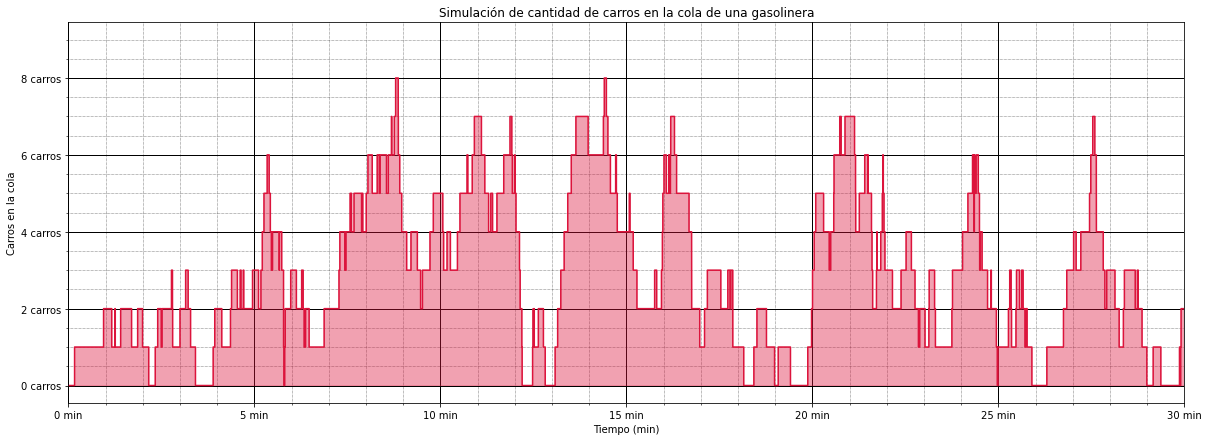

In [41]:
estados, tiempos, Omega_inv = random_walk(1000) 
t = np.array([sum(tiempos[0:x]) for x in range(len(estados))])
fig, (ax1) = plt.subplots(nrows=1, sharex=True, figsize=(20, 7))
# Gráfica
# Titulo
ax1.set_title("Simulación de cantidad de carros en la cola de una gasolinera")
# STEP
ax1.step(t, estados, where = 'post', c='crimson')
# Fill
ax1.fill_between(t, estados, step = "post", color = 'crimson', alpha= 0.4)
# 30mins
ax1.set_xlim(0, 30)
# Labels
ax1.set_ylabel("Carros en la cola")
ax1.set_xlabel("Tiempo (min)")
# GRID
ax1.minorticks_on()
# Customize the major grid
ax1.grid(which='major', linestyle='-', linewidth='1', color='black')
# Customize the minor grid
ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# Ponemos el grid detras de la grafica
ax1.set_axisbelow(True)
# yticks
ax1.set_xticklabels([str(i)+" min" for i in range(0,31,5)])
# xticks
ax1.set_yticklabels([str(i)+" carros" for i in range(-2,20,2)])
plt.show()

---
**Universidad de Costa Rica** | Facultad de Ingeniería | Escuela de Ingeniería Eléctrica

&copy; 2022

---